### install pandas numpy matplotlib

In [118]:

%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


### Import pandas and read Csv

In [119]:

# TODO: Importera pandas
import pandas as pd

!pwd
%cd "../data"
# TODO: Ladda in data från CSV-fil
df = pd.read_csv('winequality-red.csv')

# TODO: Visa första 5 raderna
df.head()

# TODO: Visa antal rader och kolumner
df.shape

# TODO: Lista alla kolumner
df.columns


c:\SystemUtvecklare_utbildning\Big_data\big-data-iot-labs\data


'pwd' is not recognized as an internal or external command,
operable program or batch file.


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### plot for show data

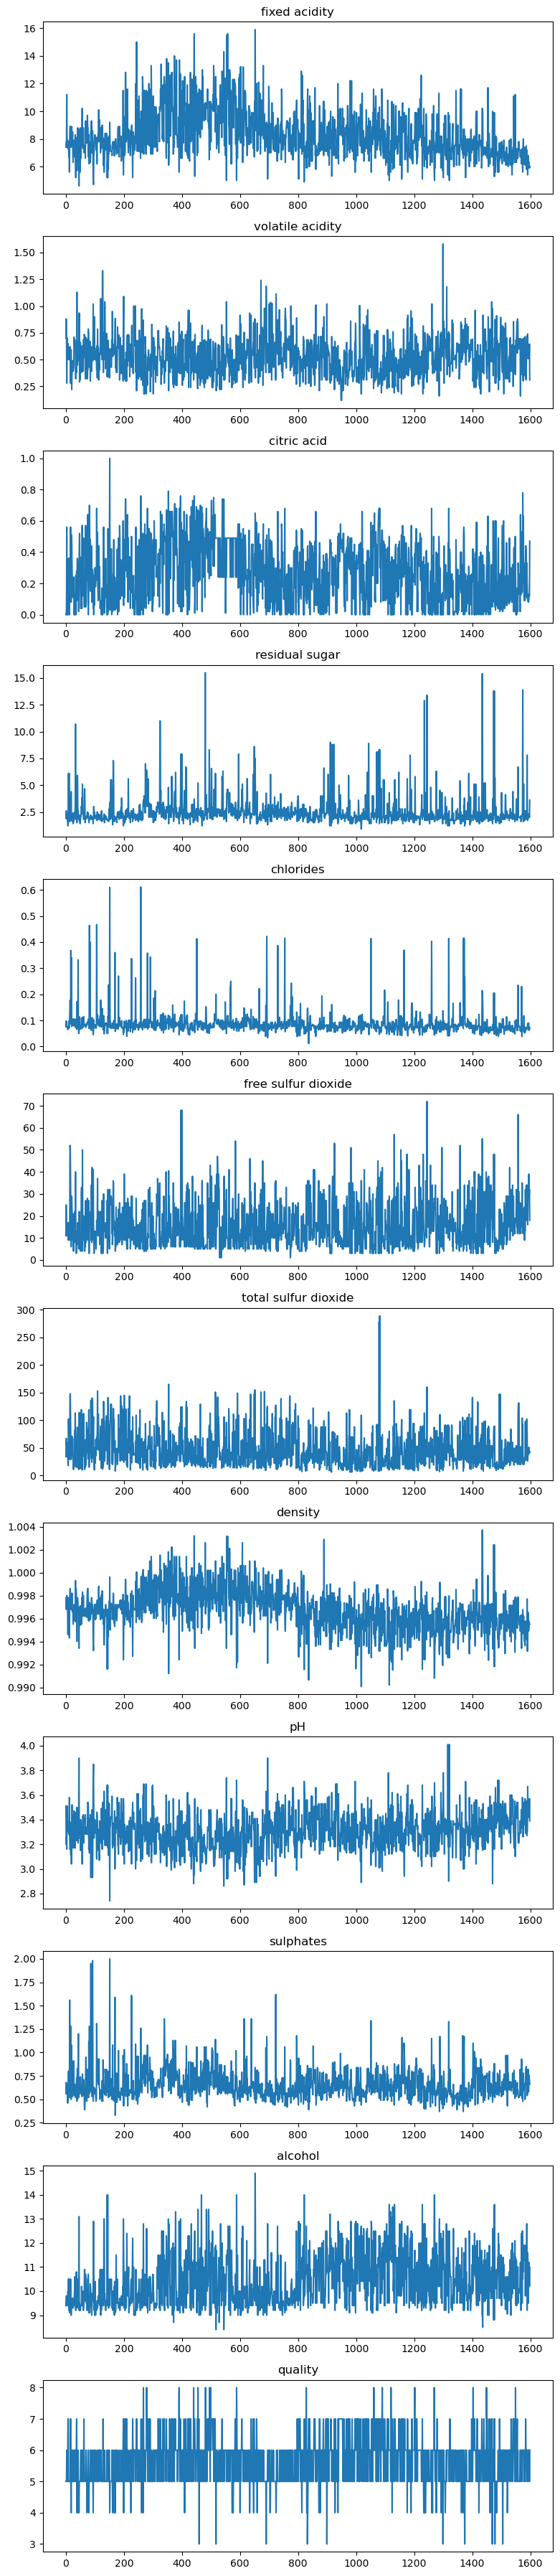

In [120]:
import matplotlib.pyplot as plt

def find_outlier_data(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))  # en kolumn av subplots

    for ax, col in zip(axes, columns):
        ax.plot(df[col])
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

find_outlier_data(df, df.columns)


### check nan value


In [121]:
check_nans=df.isna().sum()
print(check_nans)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Outliers


In [122]:

# TODO: Visa statistik för numeriska kolumner
#print(df.describe())

# TODO: Kolla efter outliers (extremvärden)
df_test = (df.loc[:, df.columns != 'quality']).copy()
# print(f"total rows: {len(df)}")

# print(df_test.loc[:, df_test.columns != 'quality'])
for col in df_test.columns:
    Q1 = df_test[f"{col}"].quantile(0.25)
    Q3 = df_test[f"{col}"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #print(f"col: {col} --- IQR: {IQR} --- low: {lower_bound} --- high: {upper_bound}")

    outlier = df_test[(df_test[f"{col}"] > lower_bound) | (df_test[f"{col}"] < upper_bound)]
    # print("Outliers:\n")
print(outlier.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


### Check dublicateds and drop duplicateds


In [123]:
# TODO: Kolla efter duplikate
dups=df.duplicated()
print(dups)

df=df.drop_duplicates()

dropted_dups=df.duplicated()
print(dropted_dups)




0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool
0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool


### Show data with bar chart

In [124]:
import matplotlib.pyplot as plt

def bar_subplots(dataFrame, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))

    for ax, col in zip(axes, columns):
        ax.bar(dataFrame.index, dataFrame[col])
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

# bar_subplots(df, df.columns)


### show data with histogram chart


In [125]:
import matplotlib.pyplot as plt

def hist_subplots(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))
    colors = ['red','blue','green','orange','purple','brown','orange','gray','cyan','magenta','yellow','black']
    for ax, col,color in zip(axes, columns,colors):
        ax.hist(df[col],bins=7, edgecolor='black', color=color, alpha=0.7)
        ax.set_title(col,color=color)

    plt.tight_layout()
    plt.show()

# hist_subplots(df, df.columns)


### Good quality wine data graphs

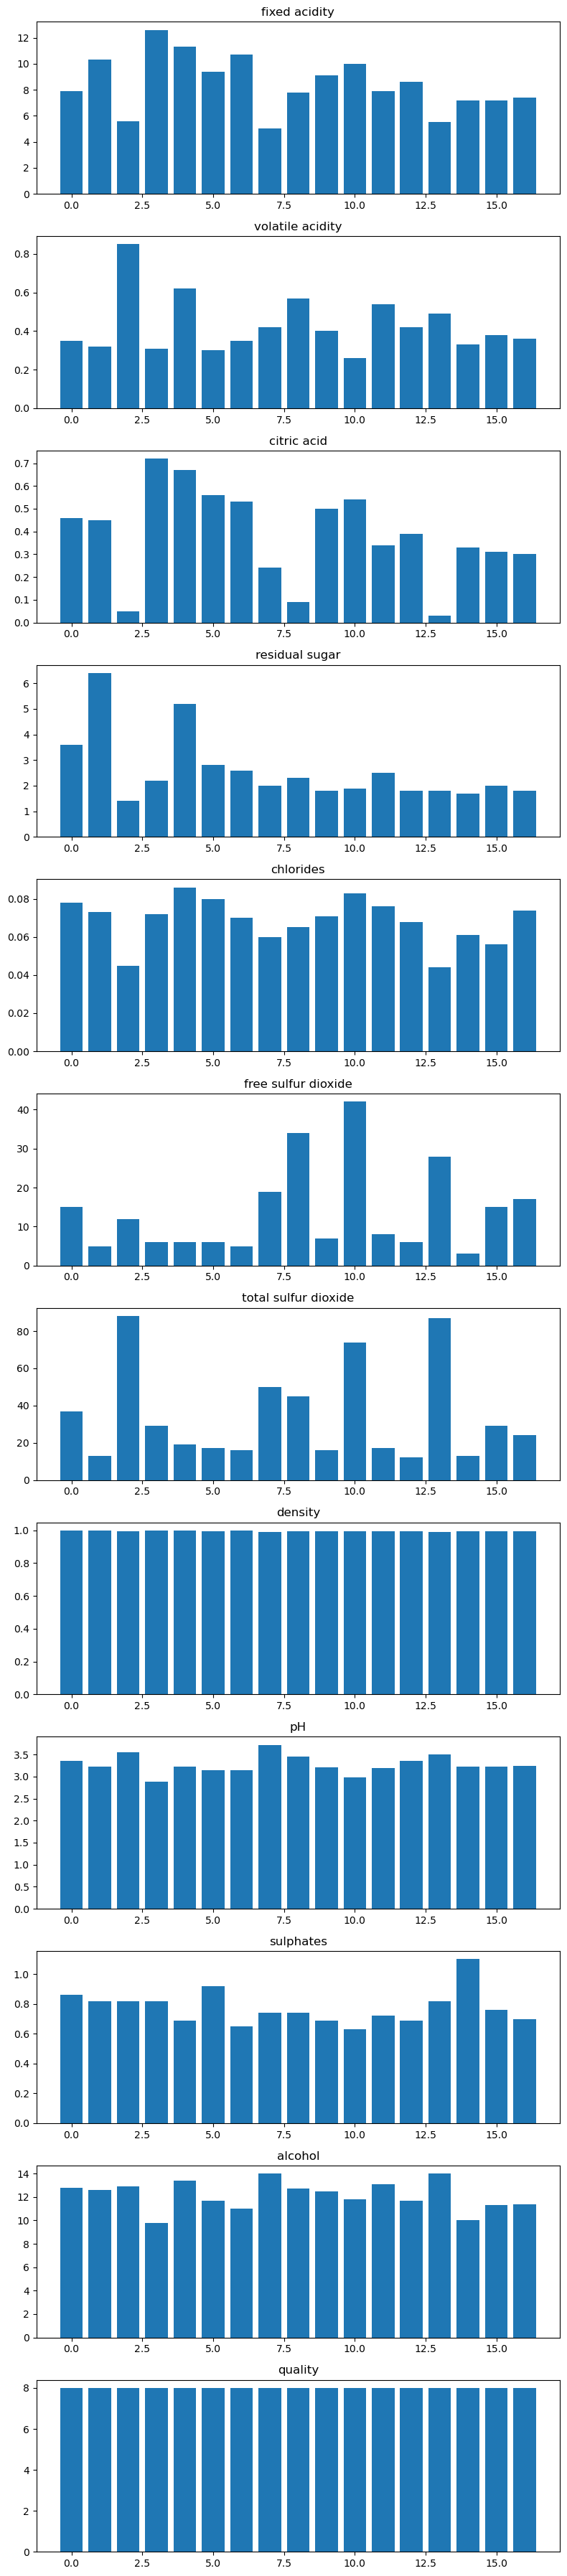

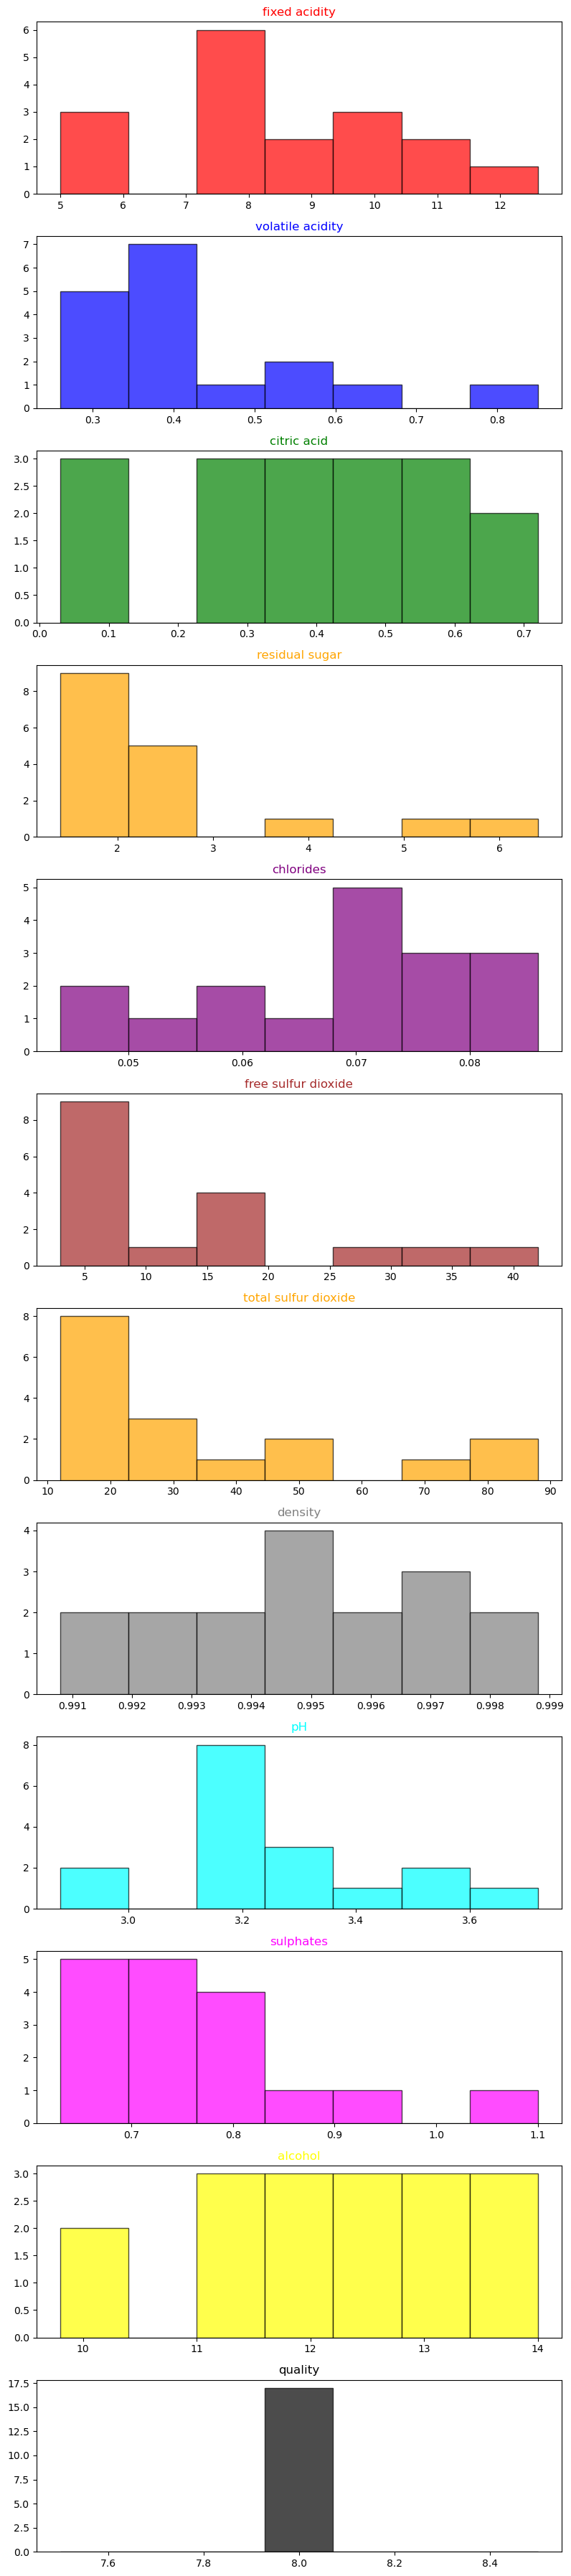

In [126]:
good_quality_wine = df[(df['quality'] >= 7.5)]
good_quality_wine.reset_index(drop=True, inplace=True)

bar_subplots(good_quality_wine, good_quality_wine.columns)
hist_subplots(good_quality_wine, good_quality_wine.columns)


### Machine learning

In [127]:
%pip install scikit-learn

print("✅ scikit-learn installerad!")

Note: you may need to restart the kernel to use updated packages.
✅ scikit-learn installerad!


In [128]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve
)

from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print(" Bibliotek importerade!")
print("Vi använder sklearn - världens enklaste ML-bibliotek")

 Bibliotek importerade!
Vi använder sklearn - världens enklaste ML-bibliotek


In [129]:

print(" VÄLJ DATA FÖR MODELLEN")
print("=" * 60)

# TARGET (vad vi vill förutsäga)
Y = df['quality']
print(f" Target (Y): quality")
print(f"   → Detta ska modellen lära sig förutsäga\n")

X = df.loc[:, df.columns != 'quality']

print(f"\n Data shape:")
print(f"   X: {X.shape} (rader, kolumner)")
print(f"   Y: {Y.shape} (rader)")

 VÄLJ DATA FÖR MODELLEN
 Target (Y): quality
   → Detta ska modellen lära sig förutsäga


 Data shape:
   X: (1359, 11) (rader, kolumner)
   Y: (1359,) (rader)


### Classifing

In [130]:
#Skapa en kategori:
# 1 = hög temperatur
# 0 = låg temperatur
df_cls = df.copy()

df_cls["Good_quality"] = (df["quality"] > 6.5).astype(float)

print(df_cls[["quality", "Good_quality"]].head(20))

    quality  Good_quality
0         5           0.0
1         5           0.0
2         5           0.0
3         6           0.0
5         5           0.0
6         5           0.0
7         7           1.0
8         7           1.0
9         5           0.0
10        5           0.0
12        5           0.0
13        5           0.0
14        5           0.0
15        5           0.0
16        7           1.0
17        5           0.0
18        4           0.0
19        6           0.0
20        6           0.0
21        5           0.0


In [131]:
df2 = df.loc[:,df.columns != 'quality']

x_clf =df2[df2.columns]
y_clf = df_cls[['Good_quality']]

X_train, X_test, Y_train, Y_test = train_test_split(
    x_clf, y_clf, test_size=0.2, random_state=42)






### Logical regression

In [132]:
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver="liblinear"   
)
log_reg.fit(X_train, Y_train)

y_pred_log = log_reg.predict(X_test)

print("\nLogistisk regression")
print("Accuracy:", accuracy_score(Y_test, y_pred_log))

precision = precision_score(y_true=Y_test, y_pred=y_pred_log, average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_log, average='micro')

print("Precision:", precision)
print("Recall:", recall)

c:\Users\mahdi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Logistisk regression
Accuracy: 0.8014705882352942
Precision: 0.8014705882352942
Recall: 0.8014705882352942


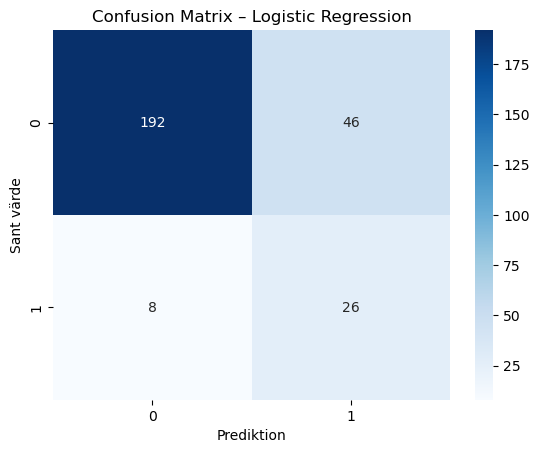

In [133]:
cm_log = confusion_matrix(Y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Prediktion")
plt.ylabel("Sant värde")
plt.show()

### Random forest classifier

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, Y_train)

y_pred_rf_clf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(Y_test, y_pred_rf_clf))
precision = precision_score(y_true=Y_test, y_pred=y_pred_rf_clf,average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_rf_clf, average='micro')

print("\nRandom Forest Regression")
print("Precision:", precision)
print("Recall:", recall)

c:\Users\mahdi\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Classifier
Accuracy: 0.9044117647058824

Random Forest Regression
Precision: 0.9044117647058824
Recall: 0.9044117647058824


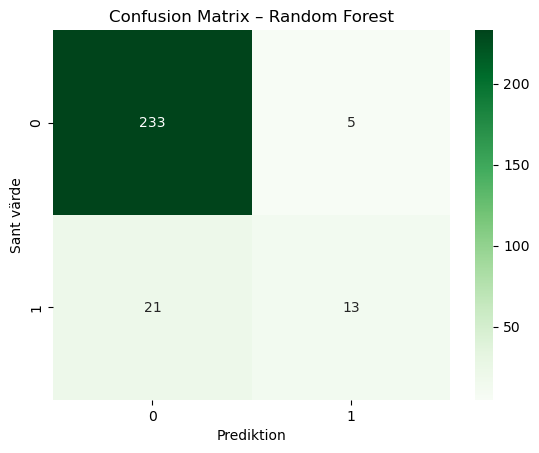

In [135]:
cm_rf = confusion_matrix(Y_test, y_pred_rf_clf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Prediktion")
plt.ylabel("Sant värde")
plt.show()

In [136]:
importances = rf_clf.feature_importances_
features = x_clf.columns

df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(df.sort_values('Importance', ascending=False))

                 Feature  Importance
10               alcohol    0.157999
9              sulphates    0.119293
1       volatile acidity    0.105253
7                density    0.098201
2            citric acid    0.091125
6   total sulfur dioxide    0.077497
0          fixed acidity    0.076761
4              chlorides    0.074909
3         residual sugar    0.069713
5    free sulfur dioxide    0.065434
8                     pH    0.063814
